In [ ]:
import pandas as pd 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample #  downsample the dataset
from sklearn.model_selection import train_test_split #  splitting the dataset into train and test split
from sklearn.preprocessing import scale # scale and center the data
from sklearn.svm import SVC #  SVM for classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV #  cross validation
from sklearn.metrics import plot_confusion_matrix #  draw the confusion matrix
from sklearn.decomposition import PCA #  perform PCA to plot the data
from sklearn.impute import SimpleImputer
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
import seaborn as sns

In [ ]:
data = pd.read_csv("oasis_longitudinal.csv")

In [ ]:
pd.set_option('display.max_columns', None) # shows the columns 
pd.set_option('display.max_rows', None)

In [ ]:
data.head()


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
data.shape

(373, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [ ]:
data['M/F'] = [1 if each == "M" else 0 for each in data['M/F']]
data['Group'] = [1 if each == "Demented" or each == "Converted" else 0 for each in data['Group']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    int64  
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    int64  
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(7), object(3)
memory usage: 43.8+ KB


In [ ]:
data.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [ ]:
median = data['MMSE'].median()
data['MMSE'].fillna(median, inplace=True)
data.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           0
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [ ]:
median = data['SES'].median()
data['SES'].fillna(median, inplace=True)
data.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [ ]:
y = data['Group'].values
X = data[['M/F', 'SES', 'ASF', 'Age', 'eTIV','MMSE', 'nWBV', 'EDUC', 'CDR']]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    int64  
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    int64  
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         373 non-null    float64
 10  MMSE        373 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(7), object(3)
memory usage: 43.8+ KB


In [ ]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size= 0.25, random_state=42, stratify=y)


df_ytrain = pd.DataFrame(y_trainval)
df_ytest = pd.DataFrame(y_test)

print('In Training Split:')
print(df_ytrain[0].value_counts())

print('\nIn Testing Split:')
print(df_ytest[0].value_counts())

In Training Split:
0    142
1    137
Name: 0, dtype: int64

In Testing Split:
0    48
1    46
Name: 0, dtype: int64


In [ ]:
correlation_matrix = data.corr()
data_corr = correlation_matrix['Group'].sort_values(ascending=False)
data_corr

Group       1.000000
CDR         0.778049
M/F         0.222146
SES         0.038870
ASF         0.032495
Age        -0.005941
eTIV       -0.042700
Visit      -0.095507
MR Delay   -0.120638
EDUC       -0.193060
nWBV       -0.311346
MMSE       -0.520553
Name: Group, dtype: float64

In [ ]:
scaler = StandardScaler().fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_trainval_scaled

array([[-0.86240942,  0.43733601,  0.77552924, ...,  0.22440757,
        -0.855151  , -0.79745978],
       [-0.86240942, -1.34393038,  0.11646608, ..., -2.28311533,
         1.23771855, -0.79745978],
       [ 1.15954207, -0.45329718,  0.67926159, ...,  0.43336781,
         0.54009537,  0.58447363],
       ...,
       [-0.86240942, -1.34393038,  0.93103852, ..., -0.0106727 ,
         1.23771855, -0.79745978],
       [ 1.15954207,  0.43733601,  0.09425046, ..., -0.95099379,
        -0.855151  ,  0.58447363],
       [-0.86240942, -1.34393038,  1.56048087, ...,  0.43336781,
         1.23771855, -0.79745978]])

In [ ]:
X_trainval.describe()

,M/F,SES,ASF,Age,eTIV,MMSE,nWBV,EDUC,CDR
count,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000
mean,0.426523,2.508961,1.201272,76.942652,1480.064516,27.286738,0.731409,14.451613,0.288530
std,0.495460,1.124814,0.135283,7.554855,172.413891,3.757516,0.038354,2.872029,0.362462
min,0.000000,1.000000,0.883000,60.000000,1106.000000,4.000000,0.644000,6.000000,0.000000
25%,0.000000,2.000000,1.118000,71.000000,1355.500000,27.000000,0.699500,12.000000,0.000000
50%,0.000000,2.000000,1.205000,77.000000,1457.000000,29.000000,0.732000,14.000000,0.000000
75%,1.000000,3.000000,1.294500,82.000000,1569.000000,30.000000,0.758000,16.000000,0.500000
max,1.000000,5.000000,1.587000,96.000000,1987.000000,30.000000,0.837000,23.000000,2.000000


In [ ]:
X_trainval.head()

,M/F,SES,ASF,Age,eTIV,MMSE,nWBV,EDUC,CDR
260,0,3.0,1.306,77,1344,29.0,0.740,12,0.0
270,0,1.0,1.217,82,1442,29.0,0.644,18,0.0
10,1,2.0,1.293,71,1357,28.0,0.748,16,0.5
51,1,2.0,1.134,64,1547,22.0,0.737,18,0.5
20,0,2.0,1.326,80,1323,29.0,0.738,16,0.0


#**SVM**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


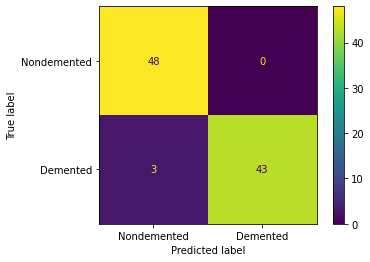

In [ ]:
clf_svm = SVC(random_state=21, C=10, gamma='scale', kernel='rbf')
clf_svm.fit(X_trainval_scaled, y_trainval)

plot_confusion_matrix(clf_svm, 
                      X_test_scaled, 
                      y_test, 
                      values_format='d', 
                      display_labels=['Nondemented', 'Demented'])

In [ ]:
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

train_score = clf_svm.score(X_trainval_scaled, y_trainval)
test_score = clf_svm.score(X_test_scaled, y_test)
y_predict = clf_svm.predict(X_test_scaled)

test_recall = recall_score(y_test, y_predict)
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
test_auc = auc(fpr, tpr)
f1score = f1_score(y_test, y_predict)


print("Train accuracy ", train_score)
print("Test accuracy ", test_score)
print("Test recall", test_recall)
print("Test AUC", test_auc)
print("F1 score ", f1score)

Train accuracy  0.978494623655914
Test accuracy  0.9680851063829787
Test recall 0.9347826086956522
Test AUC 0.9673913043478262
F1 score  0.9662921348314606


In [ ]:
param_grid = [
    {'C': [0.1,0.01, 0.5, 0.2, 1, 2, 3, 3.5, 4,5, 3.25, 4, 5, 6, 7, 8, 9, 10, 30, 50, 80, 100],
    'gamma': ['scale', 0.5, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}
]

optimal_params = GridSearchCV(SVC(),
                             param_grid,
                             cv=5,
                             scoring = 'accuracy'
                             )

optimal_params.fit(X_trainval_scaled, y_trainval)
print(optimal_params.best_params_)

{'C': 3, 'gamma': 0.5, 'kernel': 'rbf'}


In [ ]:
C = optimal_params.best_params_['C']
gamma = optimal_params.best_params_['gamma']
kernel = optimal_params.best_params_['kernel']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


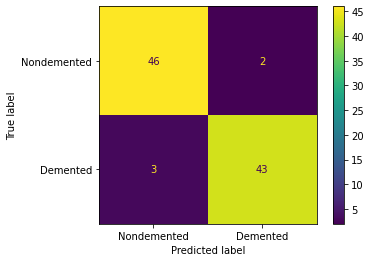

In [ ]:
clf_svm = SVC(random_state=21, C=C, gamma=gamma, kernel=kernel)
clf_svm.fit(X_trainval_scaled, y_trainval)

plot_confusion_matrix(clf_svm, 
                      X_test_scaled, 
                      y_test, 
                      values_format='d', 
                      display_labels=['Nondemented', 'Demented'])

In [ ]:
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

train_score = clf_svm.score(X_trainval_scaled, y_trainval)
test_score = clf_svm.score(X_test_scaled, y_test)
y_predict = clf_svm.predict(X_test_scaled)

test_recall = recall_score(y_test, y_predict)
svm_fpr, svm_tpr, thresholds = roc_curve(y_test, y_predict)
test_auc = auc(svm_fpr, svm_tpr)
f1score = f1_score(y_test, y_predict)

print("Train accuracy ", train_score)
print("Test accuracy ", test_score)
print("Test recall", test_recall)
print("Test AUC", test_auc)
print("F1 score ", f1score)

Train accuracy  0.996415770609319
Test accuracy  0.9468085106382979
Test recall 0.9347826086956522
Test AUC 0.9465579710144929
F1 score  0.945054945054945


#**DECISION** **TREE**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


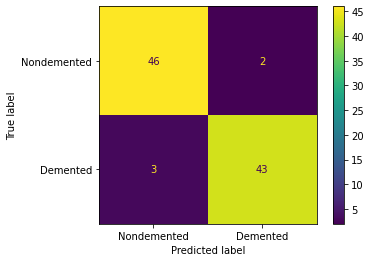

In [ ]:
clf_DTree = DecisionTreeClassifier()
clf_DTree = clf_DTree.fit(X_trainval_scaled, y_trainval)

# for test there are 94 cases
plot_confusion_matrix(clf_DTree, 
                      X_test_scaled, 
                      y_test, 
                      values_format='d', 
                      display_labels=['Nondemented', 'Demented'])

In [ ]:
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

train_score = clf_DTree.score(X_trainval_scaled, y_trainval)
test_score = clf_DTree.score(X_test_scaled, y_test)
y_predict = clf_DTree.predict(X_test_scaled)
test_recall = recall_score(y_test, y_predict)
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
test_auc = auc(fpr, tpr)
precision = precision_score(y_test, y_predict)

print("Train accuracy ", train_score)
print("Test accuracy ", test_score)
print("Test recall", test_recall)
print("Test AUC", test_auc)
print('F1 Score: %f' % f1_score(y_test, y_predict))
print('Precision: ',precision)

Train accuracy  1.0
Test accuracy  0.9468085106382979
Test recall 0.9347826086956522
Test AUC 0.9465579710144929
F1 Score: 0.945055
Precision:  0.9555555555555556


In [ ]:
param_grid = {'criterion': ['gini'],
              'min_samples_split': range(1,10),
              'max_depth': range(1,10),
              'min_samples_leaf': range(1,5)}
print(param_grid)

{'criterion': ['gini'], 'min_samples_split': range(1, 10), 'max_depth': range(1, 10), 'min_samples_leaf': range(1, 5)}


In [ ]:
from sklearn.model_selection import GridSearchCV

optimal_params = GridSearchCV(DecisionTreeClassifier(),
                             param_grid,
                             cv = 5, # 5-fold as in k-fold cross validation
                             scoring = 'accuracy', 
                             verbose = 0,
                             n_jobs = -1)

optimal_params.fit(X_trainval_scaled, y_trainval)
print(optimal_params.best_params_)

In [ ]:
optimal_params.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_split=4)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


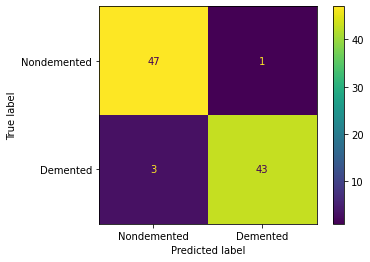

In [ ]:
best_max_depth = optimal_params.best_params_['max_depth']
best_min_samples_leaf = optimal_params.best_params_['min_samples_leaf']
best_min_samples_split = optimal_params.best_params_['min_samples_split']
best_criterion = optimal_params.best_params_['criterion']

dt_model = DecisionTreeClassifier(max_depth = best_max_depth, min_samples_leaf = best_min_samples_leaf, min_samples_split = best_min_samples_split, criterion = best_criterion).fit(X_trainval_scaled, y_trainval)

# for test there are 94 cases
plot_confusion_matrix(dt_model, 
                      X_test_scaled, 
                      y_test, 
                      values_format = 'd', 
                      display_labels = ['Nondemented', 'Demented'])

In [ ]:
from sklearn.metrics import f1_score
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

train_score = dt_model.score(X_trainval_scaled, y_trainval)
test_score = dt_model.score(X_test_scaled, y_test)
y_predict = dt_model.predict(X_test_scaled)

test_recall = recall_score(y_test, y_predict)
dt_fpr, dt_tpr, thresholds = roc_curve(y_test, y_predict)
test_auc = auc(dt_fpr, dt_tpr)
precision = precision_score(y_test, y_predict)

print("Train accuracy ", train_score)
print("Test accuracy ", test_score)
print("Test recall", test_recall)
print("Test AUC", test_auc)
print('F1 Score: %f' % f1_score(y_test, y_predict))
print('Precision: ',precision)

Train accuracy  0.989247311827957
Test accuracy  0.9574468085106383
Test recall 0.9347826086956522
Test AUC 0.9569746376811594
F1 Score: 0.955556
Precision:  0.9772727272727273


#**NAIVE** **BAYES**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


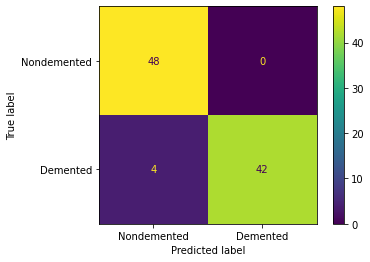

In [ ]:
gnb = GaussianNB()
gnb.fit(X_trainval_scaled, y_trainval)

plot_confusion_matrix(gnb, 
                      X_test_scaled, 
                      y_test, 
                      values_format='d', 
                      display_labels=['Nondemented', 'Demented'])

In [ ]:
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

train_score = gnb.score(X_trainval_scaled, y_trainval)
test_score = gnb.score(X_test_scaled, y_test)
y_predict = gnb.predict(X_test_scaled)

test_recall = recall_score(y_test, y_predict)
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
test_auc = auc(fpr, tpr)
f1score = f1_score(y_test, y_predict)


print("Train accuracy ", train_score)
print("Test accuracy ", test_score)
print("Test recall", test_recall)
print("Test AUC", test_auc)
print("F1 score ", f1score)

Train accuracy  0.942652329749104
Test accuracy  0.9574468085106383
Test recall 0.9130434782608695
Test AUC 0.9565217391304348
F1 score  0.9545454545454545


In [ ]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=5000)
}

optimal_params_nb = GridSearchCV(GaussianNB(),
                             param_grid_nb,
                             cv=10,   
                             verbose=1, 
                             scoring = 'accuracy'
                             )

optimal_params_nb.fit(X_trainval_scaled, y_trainval)
print(optimal_params_nb.best_params_)

Fitting 10 folds for each of 5000 candidates, totalling 50000 fits
{'var_smoothing': 0.09453554211781703}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


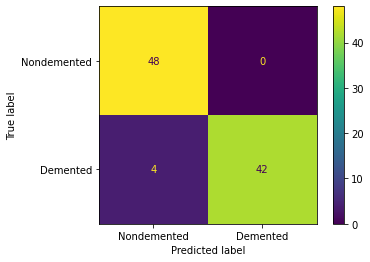

In [ ]:
gnb_ft = GaussianNB(var_smoothing = 0.08109270667833253)
gnb_ft.fit(X_trainval_scaled, y_trainval)

plot_confusion_matrix(gnb_ft, 
                      X_test_scaled, 
                      y_test, 
                      values_format='d', 
                      display_labels=['Nondemented', 'Demented'])

In [ ]:
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

train_score = gnb_ft.score(X_trainval_scaled, y_trainval)
test_score = gnb_ft.score(X_test_scaled, y_test)
y_predict = gnb_ft.predict(X_test_scaled)

test_recall = recall_score(y_test, y_predict)
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
test_auc = auc(fpr, tpr)
f1score = f1_score(y_test, y_predict)


print("Train accuracy ", train_score)
print("Test accuracy ", test_score)
print("Test recall", test_recall)
print("Test AUC", test_auc)
print("F1 score ", f1score)

Train accuracy  0.946236559139785
Test accuracy  0.9574468085106383
Test recall 0.9130434782608695
Test AUC 0.9565217391304348
F1 score  0.9545454545454545


# **KNN**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


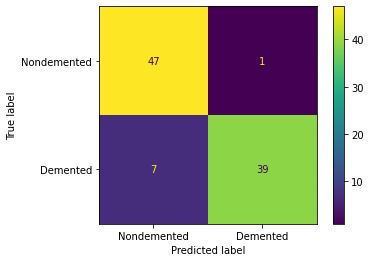

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_trainval_scaled, y_trainval)

plot_confusion_matrix(knn, 
                      X_test_scaled, 
                      y_test, 
                      values_format='d', 
                      display_labels=['Nondemented', 'Demented'])

In [ ]:
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

train_score = knn.score(X_trainval_scaled, y_trainval)
test_score = knn.score(X_test_scaled, y_test)
y_predict = knn.predict(X_test_scaled)

test_recall = recall_score(y_test, y_predict)
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
test_auc = auc(fpr, tpr)
f1score = f1_score(y_test, y_predict)


print("Train accuracy ", train_score)
print("Test accuracy ", test_score)
print("Test recall", test_recall)
print("Test AUC", test_auc)
print("F1 score ", f1score)

Train accuracy  0.953405017921147
Test accuracy  0.9148936170212766
Test recall 0.8478260869565217
Test AUC 0.9134963768115942
F1 score  0.9069767441860466


# KNN Fine Tuning 

In [ ]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [ ]:
scaler = StandardScaler()

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
operations = [('scaler', scaler), ('knn', knn)]

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline(operations)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
k_values = list(range(1,30))

In [ ]:
param_grid = {
    'knn__n_neighbors': k_values
}

In [ ]:
full_cv_classifier = GridSearchCV(pipe,param_grid, cv=5, scoring = 'accuracy')

In [ ]:
full_cv_classifier.fit(X_trainval_scaled, y_trainval)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [ ]:
full_cv_classifier.best_estimator_.get_params()

{'knn': KNeighborsClassifier(n_neighbors=1),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform',
 'memory': None,
 'scaler': StandardScaler(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


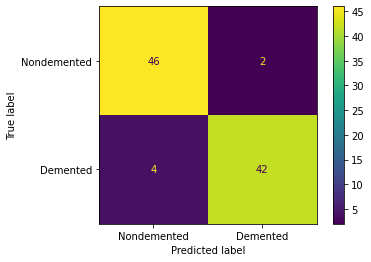

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_ft = KNeighborsClassifier(n_neighbors=1, leaf_size=30, metric='minkowski', p=2, weights='uniform')
knn_ft.fit(X_trainval_scaled, y_trainval)

plot_confusion_matrix(knn_ft, 
                      X_test_scaled, 
                      y_test, 
                      values_format='d', 
                      display_labels=['Nondemented', 'Demented'])

In [ ]:
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

train_score = knn_ft.score(X_trainval_scaled, y_trainval)
test_score = knn_ft.score(X_test_scaled, y_test)
y_predict = knn_ft.predict(X_test_scaled)

test_recall = recall_score(y_test, y_predict)
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
test_auc = auc(fpr, tpr)
f1score = f1_score(y_test, y_predict)


print("Train accuracy ", train_score)
print("Test accuracy ", test_score)
print("Test recall", test_recall)
print("Test AUC", test_auc)
print("F1 score ", f1score)

Train accuracy  1.0
Test accuracy  0.9361702127659575
Test recall 0.9130434782608695
Test AUC 0.9356884057971016
F1 score  0.9333333333333332
